# Physical Models of Living Systems: Homework 2
Laura Schulze (2122311)

Task: *Plot both SAR and EAR as a function of the relative area, using the Log Series as the SAD distribution P( n ) = c (1-m)^n / n (c is the normalization constant - see Eq. 3.29) and compare it with a Power Law SAR of exponent z ∊ (0.2,0.3) (S(a)=k A^z) and z, k tuned so the be as close as possible to the solution for the random placement case.
If you remove 1/3 of the area, how many species go extinct? Do the estimation both using the SAR and the EAR.*

*Optional suggestion: check calculations for stochastic Volterra models and see that  in the limit $N\to\infty$ it corresponds to deterministic Volterra equations.*

## Calculating SAR and EAR
We assume the SAD is a log series:
$$
    P(n)=\frac{c \cdot (1-m)^n}{n}
$$
where the normalization constant $c=\frac{1}{|\log(m)|}$, and $m$ is the migration rate.

### SAR:
$$
\begin{align}
    SAR(\alpha) &= S \left[ 1 - \sum^\infty_{n_i=1} (1-\alpha)^{n_i} P(n_i) \right] \\
    &=  S \left[ 1 - \sum^\infty_{n_i=1} (1-\alpha)^{n_i} \frac{c \cdot (1-m)^{n_i}}{n_i} \right] \\
    &=  S \left[ 1 - c\sum^\infty_{n_i=1} \frac{\left[(1-\alpha)(1-m)\right]^{n_i}}{n_i} \right] \\
    &= S \biggl[ 1 - c\Bigl(-\log{\left\{ 1-(1-\alpha)(1-m)\right\}}\Bigr)\biggr] \\
    &= S \Bigl[ 1 + c \log{\left\{ m(1-\alpha) + \alpha\right\}}\Bigr] \\
\end{align}
$$

### EAR:
$$
\begin{align}
    EAR(\alpha) &= S \sum^\infty_{n_i=1} \alpha^{n_i} P(n_i) \\
    &=  S \sum^\infty_{n_i=1} (\alpha)^{n_i} \frac{c \cdot (1-m)^{n_i}}{n_i} \\
    &=  S \ c\sum^\infty_{n_i=1} \frac{\left[\alpha(1-m)\right]^{n_i}}{n_i} \\
    &= - S\  c \log{\left\{1-\alpha(1-m)\right\}} \\
\end{align}
$$

## Plotting SAR and EAR, and comparing to power law
SAR and EAR are computed for a range of relative areas $\alpha$. To perform the comparison with the power law SAR $S(\alpha)=k \alpha^z$ with exponent $z\in((0.2,0.3)$, the problem is linearized via logarithm, and a linear fit is performed to find the closest parameters $k$, $z$: 
$$\log(S(\alpha)) = \log(k) + z\log(\alpha)$$

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to compute the SAR as outlined above
def SAR(alpha, S=10, m=0.1):
    c = np.abs(1/np.log(m))  # normalization constant
    sar = S*(1. + c*np.log(m*(1.-alpha)+alpha))
    return sar

# function to compute the EAR as outlined above
def EAR(alpha, S=10, m=0.1):
    c = np.abs(1/np.log(m))  # normalization constant
    ear = -S * c * np.log(1-alpha*(1-m))
    return ear

In [3]:
# set parameters (change them to play around)
m = 0.01  # migration rate
S = 100  # total number of species

# generate sample values for relative area alpha
N = 10000  # number of alpha values to test
alphas = np.logspace(-5, 0, N)  # alpha values

sar = np.array([SAR(alpha, S, m) for alpha in alphas])  # compute SAR
ear = np.array([EAR(alpha, S, m) for alpha in alphas])  # compute EAR

# reducing the area by 1/3 corresponds to alpha = 2/3
alpha = 2./3.
sar_3 = SAR(alpha, S, m)
ear_3 = EAR(alpha, S, m)

print(f"Approx. number of remaining species at only 2/3 of the area, with S={S}, m={m}:")
print(f"- based on SAR: {round(sar_3)}, corresponding to approx. {100*sar_3/S:.0f}% of total species S")
print(f"- based on EAR: {round(ear_3)}, corresponding to approx. {100*ear_3/S:.0f}% of total species S")

Approx. number of remaining species at only 2/3 of the area, with S=100, m=0.01:
- based on SAR: 91, corresponding to approx. 91% of total species S
- based on EAR: 23, corresponding to approx. 23% of total species S


In [4]:
# power law fit
# transform into linear problem via logarithm
log_alpha = np.linspace(-5, 0, N)
log_sar = np.log10(sar)
# perform linear fit
z, log_k = np.polyfit(log_alpha, log_sar, deg=1)
k = 10**log_k
print(f"Fitted coefficients: k = {k}, z = {z}")

Fitted coefficients: k = 302.5209623180553, z = 0.7712886423205986


<function matplotlib.pyplot.show(close=None, block=None)>

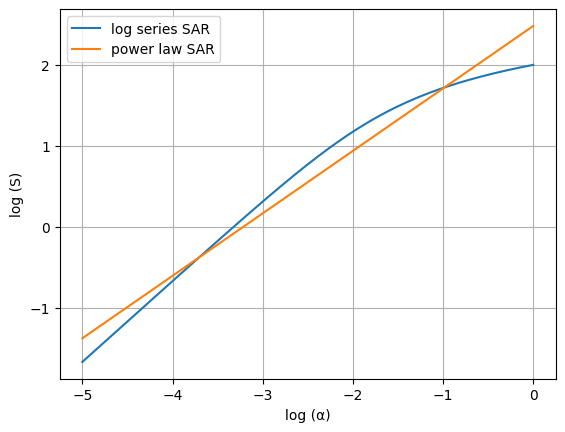

In [5]:
# quick check   
fig, ax = plt.subplots()
ax.plot(log_alpha, log_sar, label = "log series SAR")
ax.plot(log_alpha, z*log_alpha + log_k, label = "power law SAR")
ax.set_xlabel("log (α)")
ax.set_ylabel("log (S)")
ax.grid()
ax.legend()
plt.show

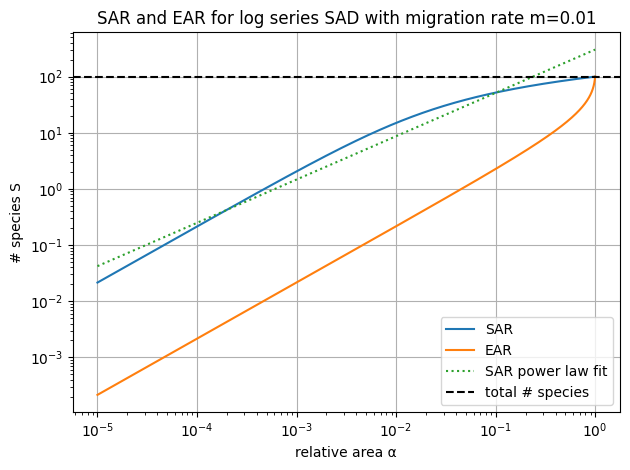

In [6]:
# compute power law values for plotting:
sar_pow = k*alphas**z

# plot everything
fig, ax = plt.subplots(tight_layout=True)
ax.plot(alphas, sar, label="SAR")
ax.plot(alphas, ear, label="EAR")
ax.plot(alphas, sar_pow, label="SAR power law fit", ls=":")

ax.set_xlabel("relative area α")
ax.set_ylabel("# species S")
ax.set_xscale("log")
ax.set_yscale("log")
ax.axhline(S, ls="--", color="k", label="total # species")
#ax.axvline(2/3, ls=":", color="tab:green", label="2/3 relative area")
ax.grid()
ax.legend(loc="best")
ax.set_title(f"SAR and EAR for log series SAD with migration rate m={m}")
plt.show()

## Correction for the comparison with the SAR power law fit
The fit parameters above are not within the given interval of exponent $z\in(0.2, 0.3)$ since with the given strategy and the logscale data in the given area range mostly the lower part of the curve is captured, whereas the goal appears to be to capture the behaviour at the intermediate scale, where the curve is flatter. To that end, a different fit is performed, this time using equidistant values for $\alpha$ and fitting the power law directly with `scipy.optimize.curve_fit`. 

In [7]:
from scipy.optimize import curve_fit

alphas = np.linspace(0, 1, N)
sar = SAR(alphas, S, m)
ear = EAR(alphas, S, m)

def pow_law(alpha, k, z):
    return k*alpha**z

p0 = [S, 0.25]
popt, _ = curve_fit(pow_law, alphas, sar, p0=p0)
sar_pow = pow_law(alphas, *popt)
print(f"Fitted coefficients: k = {popt[0]}, z = {popt[1]}")

Fitted coefficients: k = 102.79376183655228, z = 0.2943497830664899


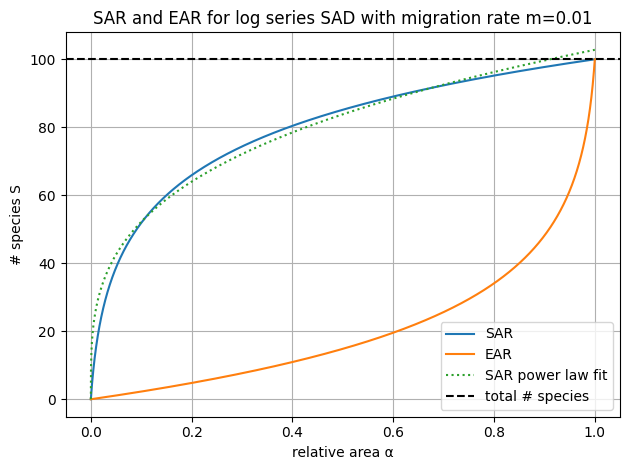

In [8]:
# plot everything
fig, ax = plt.subplots(tight_layout=True)
ax.plot(alphas, sar, label="SAR")
ax.plot(alphas, ear, label="EAR")
ax.plot(alphas, sar_pow, label="SAR power law fit", ls=":")

ax.set_xlabel("relative area α")
ax.set_ylabel("# species S")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.axhline(S, ls="--", color="k", label="total # species")
ax.grid()
ax.legend(loc="best")
ax.set_title(f"SAR and EAR for log series SAD with migration rate m={m}")
plt.show()

And for fun, the same plot with loglogscale axes:

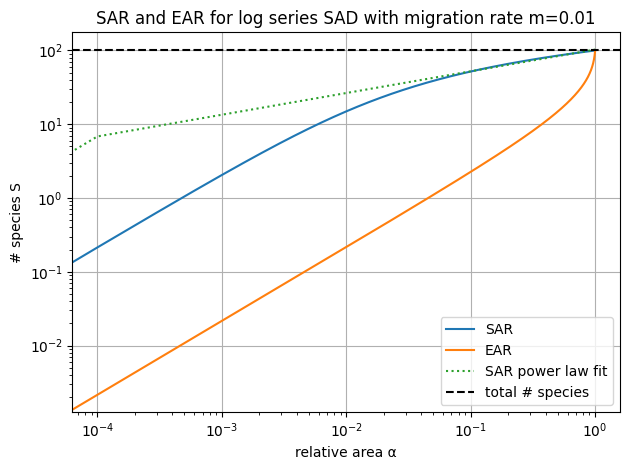

In [9]:
# plot everything
fig, ax = plt.subplots(tight_layout=True)
ax.plot(alphas, sar, label="SAR")
ax.plot(alphas, ear, label="EAR")
ax.plot(alphas, sar_pow, label="SAR power law fit", ls=":")

ax.set_xlabel("relative area α")
ax.set_ylabel("# species S")
ax.set_xscale("log")
ax.set_yscale("log")
ax.axhline(S, ls="--", color="k", label="total # species")
ax.grid()
ax.legend(loc="best")
ax.set_title(f"SAR and EAR for log series SAD with migration rate m={m}")
plt.show()